# General Instructions to students:

1. There are 4 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages, unless needed.

4. The code is to be written in Python 3.x syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/printed.

6. If TextWrite cells ask you to give accuracy/error/other numbers, you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook will get zero marks.

8. All code must be written by you. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

10. All plots must be labelled properly, the labels/legends should be readable, all tables must have rows and columns named properly.

11. Change the name of file with your roll no. For example cs15d203.ipynb (for notebook) and cs15d203.py (for plain python script)





In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


**Cell type : TextRead**

6b) Write a code to do polynomial regression with quadratic regularization that takes degree d and regularization parameter λ as input.

In [2]:
# Cell type : CodeWrite
# write the function for Polynomial regression with quadratic regularization here.

def polyregression(Data: np.ndarray, lambda_l: float, degree: int = 24) -> np.ndarray:
    """Build the regression model 
    Args:
        Data (np.ndarray): Input data of shape [N, 2]
        lambda_l (float): Regularization parameter.
        degree (int, optional): Degree of the polynomial. Defaults to 24.
    Returns:
        weights (np.ndarray): Weights of the polynomial regression model.
    """
    x = Data[:, 0]
    y = Data[:, 1]

    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x.reshape(-1, 1))  # [N, degree+1]

    I = np.eye(x_poly.shape[1])
    I[0, 0] = 0

    weights = np.linalg.inv(x_poly.T @ x_poly + lambda_l * I) @ x_poly.T @ y
    return weights

6c)Run the code for degree $d = 24$ and for each $\lambda$ in the set:

$$
\{10^{-15},\ 10^{-9},\ 10^{-6},\ 10^{-3},\ 10^{-2},\ 10^{-1},\ 1,\ 10^{1},\ 10^{2},\ 10^{3},\ 10^{6},\ 10^{9},\ 10^{15}\}
$$


  i) Perform 5-fold cross-validation on the 100 data points (20 datapoints in each fold). For each fold, compute both training and validation errors using the mean squared error loss function. 
  
  ii) Calculate the average training and validation errors across the 5 folds.

In [3]:
# Cell type : CodeWrite
np.random.seed(42)  
def KFold_Poly(Data: np.ndarray, lambda_l: float, degree: int = 24) -> tuple:
    """ Split data for training and testing. Then train the model. Use the trained model to make predictions for test data 
    Arguments:
        Data (np.ndarray): Input data of shape [N, 2]
        lambda_l (float): Regularization parameter
        degree (int): Degree of the polynomial
    Returns:
        train_loss (float): Average training loss across folds
        val_loss (float): Average validation loss across folds
    """
    n_splits = 5
    indices = np.arange(len(Data))
 
    np.random.shuffle(indices)
    folds = np.array_split(indices, n_splits)

    train_losses = []
    val_losses = []

    for i in range(n_splits):
        val_idx = folds[i]
        train_idx = np.hstack([folds[j] for j in range(n_splits) if j != i])
        train_Data = Data[train_idx]
        val_Data = Data[val_idx]

        # Fit model on training fold
        weights = polyregression(train_Data, lambda_l=lambda_l, degree=degree)

        # Build polynomial features for train and val
        poly = PolynomialFeatures(degree=degree)
        x_train, y_train = train_Data[:, 0], train_Data[:, 1]
        x_val, y_val = val_Data[:, 0], val_Data[:, 1]
        X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
        X_val_poly = poly.fit_transform(x_val.reshape(-1, 1))

        y_pred_train = X_train_poly @ weights
        y_pred_val = X_val_poly @ weights

        train_loss = np.mean((y_train - y_pred_train) ** 2) 
        val_loss = np.mean((y_val - y_pred_val) ** 2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return np.mean(train_losses), np.mean(val_losses)


d = 24
lambda_values = [1e-15, 1e-9, 1e-6, 1e-3, 0.01, 0.1, 1, 10, 10**2, 10**3, 10**6, 10**9, 10**15]
data = np.loadtxt('data/bayes_variance_data.csv', delimiter=',', skiprows=1)

avg_train_errors = []
avg_val_errors = []

for lam in lambda_values:
    train_err, val_err = KFold_Poly(data, lambda_l=lam, degree=d)
    avg_train_errors.append(train_err)
    avg_val_errors.append(val_err)
    # print(f'Lambda: {lam:.1e}, Train Error: {train_err:.4f}, Val Error: {val_err:.4f}')

6d)  Construct a learning curve by plotting the average training and validation errors against the model complexity ($\log_{10} \lambda$). Based on this learning curve, identify the (i) model with the highest bias, (ii) model with the highest variance?, and (iii) the model that will work best on some unseen data.

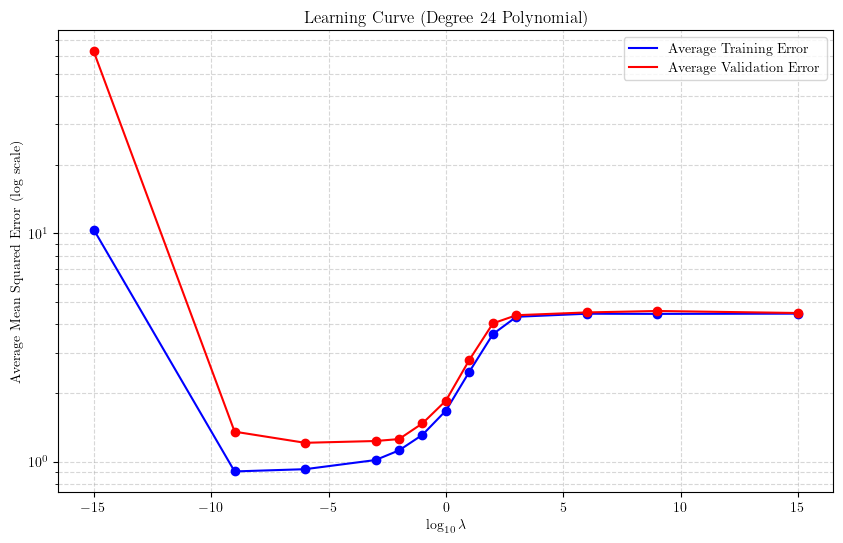

In [11]:
# Cell type : CodeWrite
# Write the code for plotting.

# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Computer Modern Roman']

log_lambda_values = np.log10(lambda_values)

plt.figure(figsize=(10, 6))
plt.plot(log_lambda_values, avg_train_errors, 'b-', label='Average Training Error')
plt.plot(log_lambda_values, avg_val_errors, 'r-', label='Average Validation Error')
plt.plot(log_lambda_values, avg_train_errors, 'bo')
plt.plot(log_lambda_values, avg_val_errors, 'ro')
# plt.xscale('log')
plt.yscale('log') 
plt.xlabel(' $\\log_{10}\\lambda$')
plt.ylabel('Average Mean Squared Error (log scale)')
plt.title(f'Learning Curve (Degree {d} Polynomial)')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
# plt.savefig('plots/learning_curve_polynomial_regression.pdf', bbox_inches='tight')
plt.show()

6e) Plot the fitted curve to the given data ($\hat{y}$ against $x$) for the three models reported in part (d).

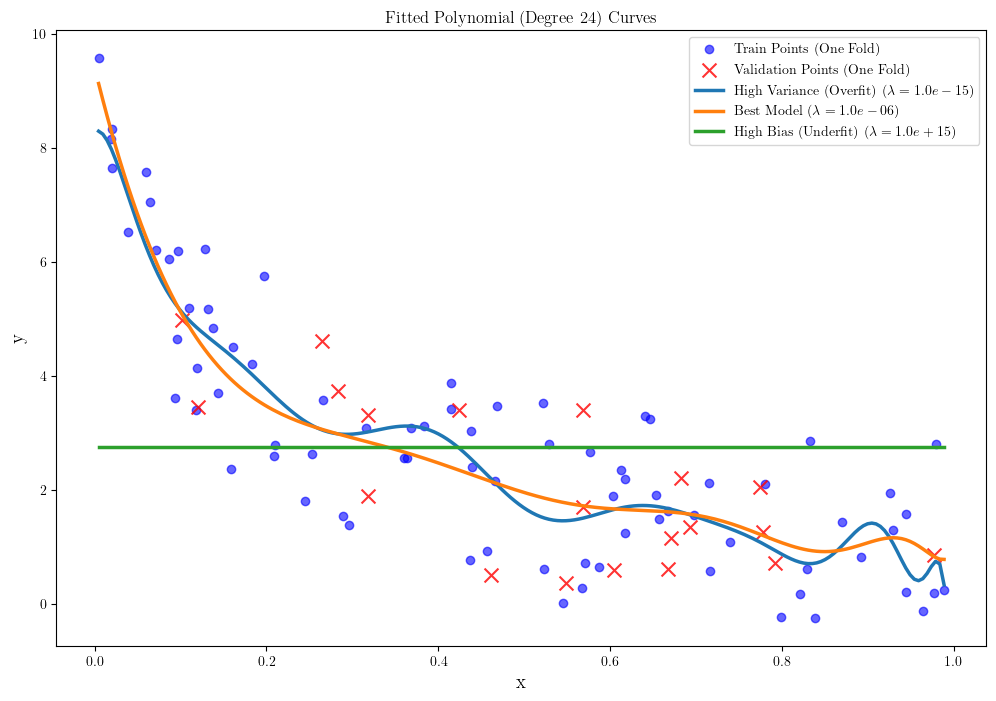

In [15]:
# Cell type : CodeWrite
# Write the code for plotting.
n_splits = 5
indices = np.arange(len(data))
np.random.seed(42) 
np.random.shuffle(indices)
folds = np.array_split(indices, n_splits)

val_idx = folds[0]
train_idx = np.hstack([folds[j] for j in range(n_splits) if j != 0])

train_fold_data = data[train_idx]
val_fold_data = data[val_idx]

lambda_for_plot = {
    'High Variance (Overfit)': 1e-15, 
    'Best Model': 1e-6,
    'High Bias (Underfit)': 1e15
}

x_range = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 200).reshape(-1, 1)
poly = PolynomialFeatures(degree=d)
x_range_poly = poly.fit_transform(x_range)

plt.figure(figsize=(12, 8))

plt.scatter(train_fold_data[:, 0], train_fold_data[:, 1], 
            alpha=0.6, label='Train Points (One Fold)', color='blue')
plt.scatter(val_fold_data[:, 0], val_fold_data[:, 1], 
            alpha=0.8, label='Validation Points (One Fold)', color='red', marker='x', s=100)

for label, lam in lambda_for_plot.items():
    weights = polyregression(data, lambda_l=lam, degree=d)
    y_pred = x_range_poly @ weights
    plt.plot(x_range, y_pred, label=f'{label} ($\\lambda={lam:.1e}$)', lw=2.5)

plt.title(f'Fitted Polynomial (Degree {d}) Curves')
plt.xlabel('x',size=14)
plt.ylabel('y',size=14)
plt.legend(loc='upper right')
# plt.savefig('plots/fitted_polynomial_curves_one_fold.pdf', bbox_inches='tight')
plt.show()

